In [56]:
import pandas as pd 
import numpy as np 
import random 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [57]:
df = pd.read_csv('rollercoaster.csv')
df = df.drop(columns=['G Force','Vertical Angle (degrees)','Duration (min:sec)','Drop (feet)'])

In [58]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
Name                      300 non-null object
Park                      300 non-null object
City/Region               300 non-null object
City/State/Region         300 non-null object
Country/Region            300 non-null object
Geographic Region         300 non-null object
Construction              300 non-null object
Type                      300 non-null object
Status                    300 non-null object
Year/Date Opened          300 non-null int64
Height (feet)             299 non-null object
Speed (mph)               296 non-null float64
Length (feet)             295 non-null float64
Inversions (YES or NO)    300 non-null object
Number of Inversions      300 non-null int64
CoasterBuzz Ranking       69 non-null float64
dtypes: float64(3), int64(2), object(11)
memory usage: 37.6+ KB


[[1.         0.26442247]
 [0.26442247 1.        ]]


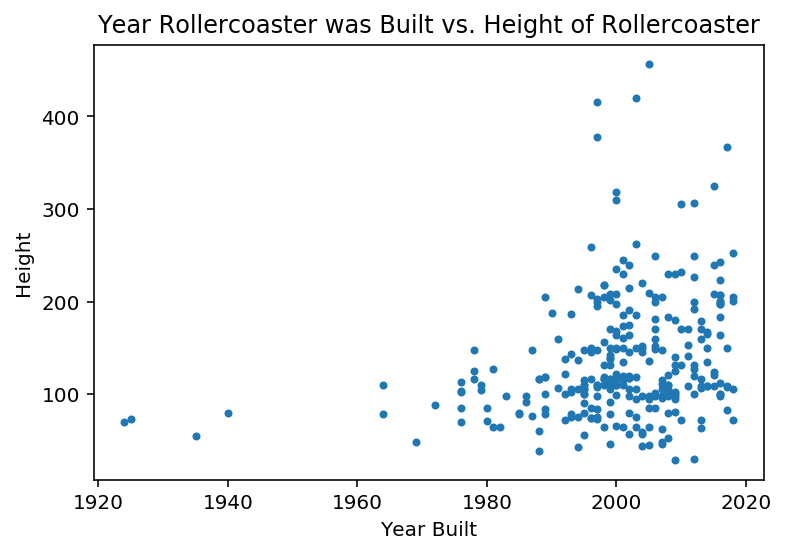

In [59]:
df = df.rename(columns={'Year/Date Opened': 'year','Height (feet)': 'height','Number of Inversions':'inversions','Speed (mph)':'speed', 'Length (feet)':'length','Drop (feet)':'drop'})
df = df.dropna(subset = ['height', 'year','speed','length'])
df.loc[111,'height'] = 200
df['height'] = df['height'].astype(float)
h = df.height
y = df.year
plt.plot(y,h,'.')
plt.xlabel('Year Built')
plt.ylabel('Height')
plt.title('Year Rollercoaster was Built vs. Height of Rollercoaster')
print(np.corrcoef(y,h)) 
#probably no correlation

Text(0.5, 1.0, 'Year Rollercoaster was Built vs. Height of Rollercoaster')

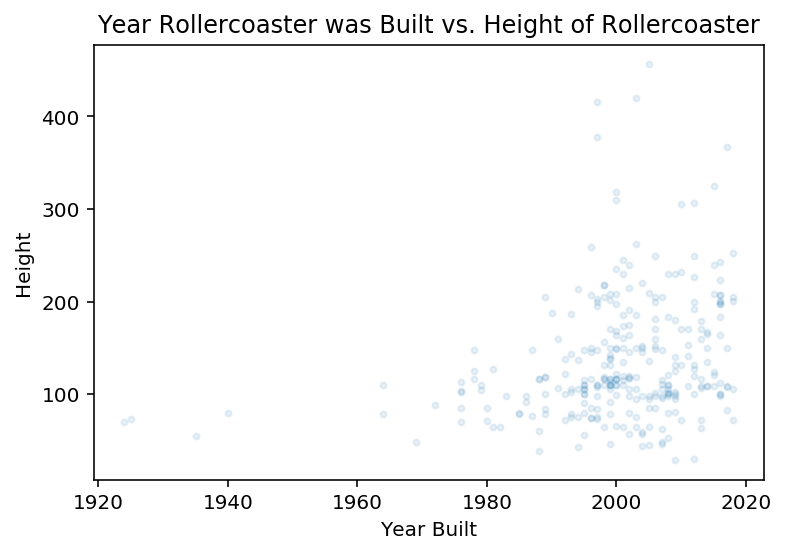

In [60]:
plt.plot(y,h,'.',alpha = 0.1)
plt.xlabel('Year Built')
plt.ylabel('Height')
plt.title('Year Rollercoaster was Built vs. Height of Rollercoaster')
#No correlation

correlation efficient:
[[1.         0.82179113]
 [0.82179113 1.        ]]


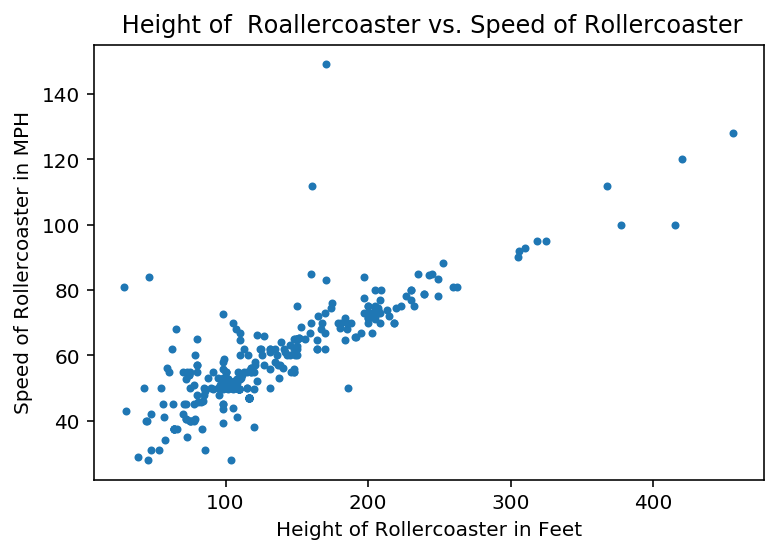

In [61]:
h = df.height
s = df.speed
plt.plot(h,s,'.')
plt.xlabel('Height of Rollercoaster in Feet')
plt.ylabel('Speed of Rollercoaster in MPH')
plt.title(' Height of  Roallercoaster vs. Speed of Rollercoaster')
print('correlation efficient:')
print(np.corrcoef(h,s))
#There is a correlation

0.1999185759609496 32.43500636066108


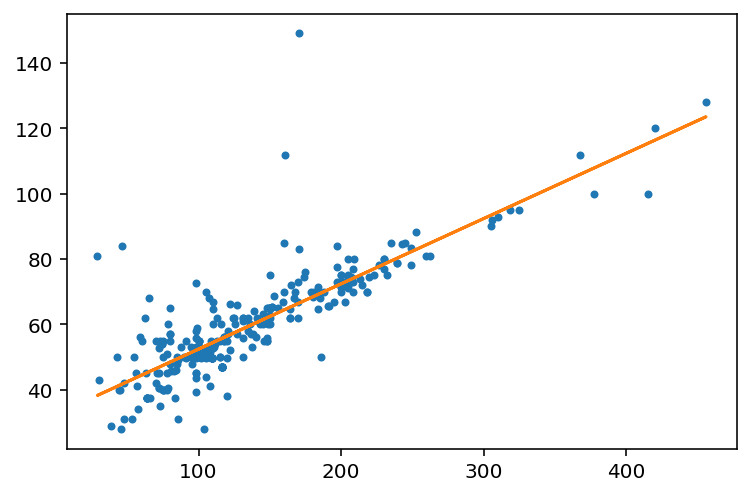

In [62]:
m, b = np.polyfit(h, s,1)
print(m,b)
fit = np.polyfit(h, s,1)
fit_fn = np.poly1d(fit)
plt.plot(h, s,'.', h, fit_fn(h))

[[1.         0.07676975]
 [0.07676975 1.        ]]


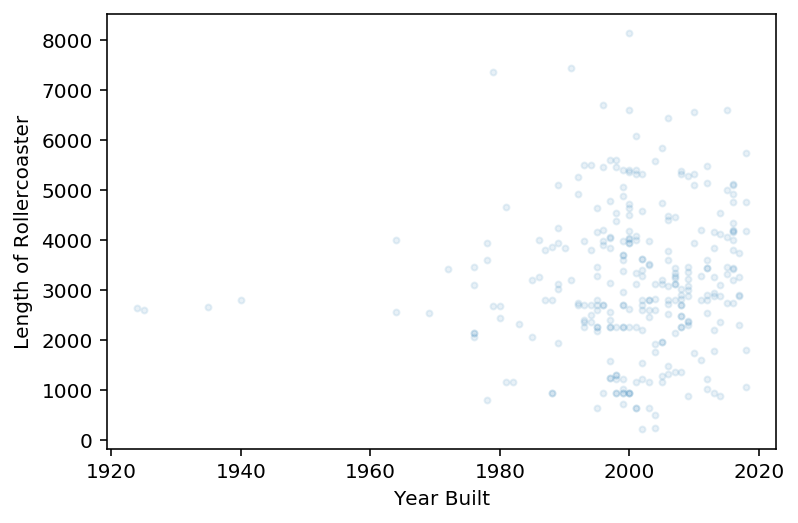

In [63]:
l = df.length
plt.plot(y,l,'.', alpha = 0.1)
plt.xlabel('Year Built')
plt.ylabel('Length of Rollercoaster')
print(np.corrcoef(y,l))
#no correlation

In [64]:
df = df.rename(columns = {'CoasterBuzz Ranking':'ranking' })
df = df.dropna(subset = ['ranking'])
print(df.ranking)

3      4.11379
4      4.07529
11     4.33879
16     4.52137
27     4.28593
        ...   
280    3.98397
287    4.70667
290    4.65263
298    4.39716
299    4.09048
Name: ranking, Length: 69, dtype: float64


[[1.         0.12989218]
 [0.12989218 1.        ]]


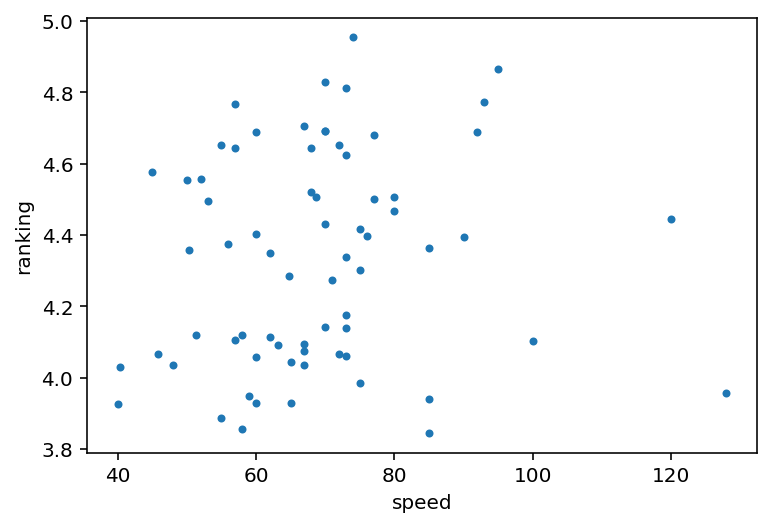

In [65]:
h = df.height
s = df.speed
l = df.length
y = df.year
r = df.ranking
plt.plot(s,r,'.')
plt.xlabel('speed')
plt.ylabel('ranking')
print(np.corrcoef(s,r))

In [66]:
df2 = pd.read_csv('rollercoaster.csv')
df2.columns = df2.columns.str.strip()
df2 = df2.rename(columns={'Drop (feet)':'drop','CoasterBuzz Ranking':'ranking', 'Height (feet)': 'height'})
df2.dropna(subset = ['drop','ranking'],inplace = True)
df2 = df2.drop([299])
df2['drop'] = df2['drop'].astype(float)

[[1.         0.02867098]
 [0.02867098 1.        ]]


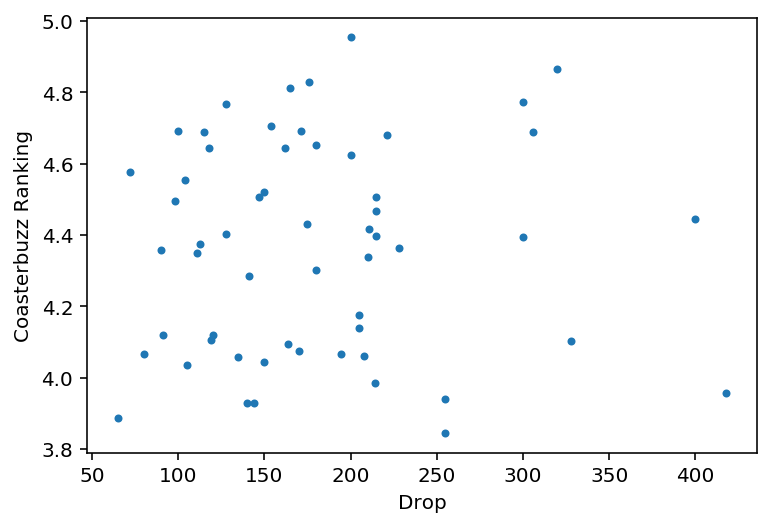

In [67]:
d = df2['drop']
r = df2['ranking']
plt.plot(d,r,'.')
plt.xlabel('Drop')
plt.ylabel('Coasterbuzz Ranking')
print(np.corrcoef(d,r))
#doesn't seem to have any correlation whatsoever

[[ 1.         -0.24690173]
 [-0.24690173  1.        ]]


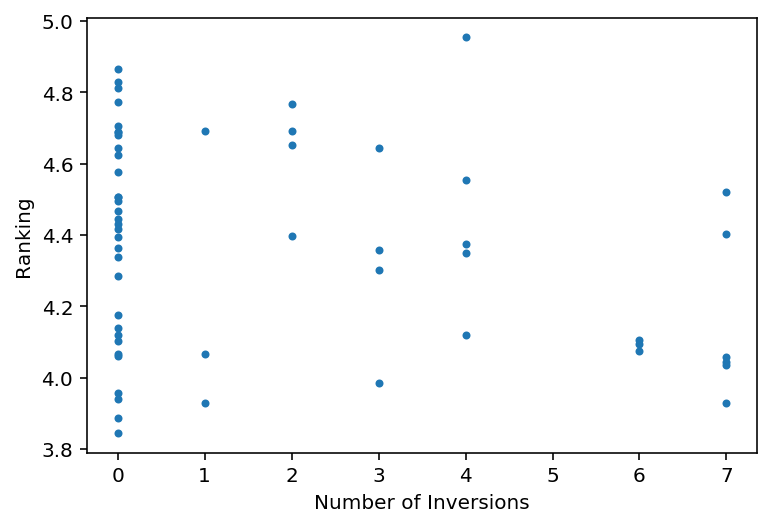

In [68]:
i = df2['Number of Inversions']
plt.plot(i,r,'.')
plt.xlabel('Number of Inversions')
plt.ylabel('Ranking')
print(np.corrcoef(i,r))

Text(0, 0.5, 'drop')

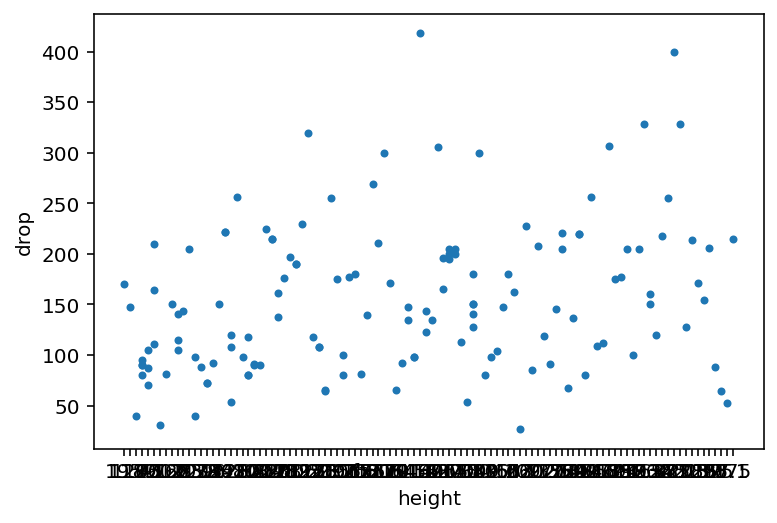

In [69]:
df3 = pd.read_csv('rollercoaster.csv')
df3.columns = df3.columns.str.strip()
df3 = df3.rename(columns={'Drop (feet)':'drop', 'Height (feet)': 'height','Number of Inversions':'inversions'})
df3.dropna(subset = ['height','drop'],inplace = True)
df3 = df3.drop([299])
df3['drop'] = df3['drop'].astype(float)
h = df3['height']
d = df3['drop']
plt.plot(h,d,'.')
plt.xlabel('height')
plt.ylabel('drop')

In [70]:
#Here we set up three seperate dataframes that only includes information for speed, height, and number of inversions in each one. We achieved this by dropping all the other irrelevant columns after cleaning the data. We also sort them into descending order so each dataframe will be ranked by its parameter.
sr = pd.read_csv('rollercoaster.csv')
sr.columns = sr.columns.str.strip()
sr = sr.dropna(subset = {'Height (feet)'})
sr = sr.drop(columns = ['Park','City/Region','G Force','Vertical Angle (degrees)','Duration (min:sec)','City/State/Region','Country/Region','Geographic Region','Construction','Type','Status','Year/Date Opened','Length (feet)','Height (feet)','Inversions (YES or NO)','Number of Inversions','Drop (feet)','CoasterBuzz Ranking'])
sr = sr.rename(columns={'Speed (mph)':'speed'})
sr = sr.dropna(subset = {'speed'})
hr = pd.read_csv('rollercoaster.csv')
hr.columns = hr.columns.str.strip()
hr = hr.dropna(subset = {'Speed (mph)'})
hr = hr.drop(columns = ['Park','City/Region','G Force','Vertical Angle (degrees)','Duration (min:sec)','City/State/Region','Country/Region','Geographic Region','Construction','Type','Status','Year/Date Opened','Length (feet)','Inversions (YES or NO)','Number of Inversions','Drop (feet)','CoasterBuzz Ranking','Speed (mph)'])
hr = hr.rename(columns={'Height (feet)':'height'})
hr = hr.dropna(subset = {'height'})
hr.loc[111,'height'] = 200
hr['height'] = hr['height'].astype(float)
ir = pd.read_csv('rollercoaster.csv')
ir.columns = ir.columns.str.strip()
ir = ir.dropna(subset = {'Speed (mph)','Height (feet)'})
ir = ir.drop(columns = ['Park','City/Region','G Force','Vertical Angle (degrees)','Duration (min:sec)','City/State/Region','Country/Region','Geographic Region','Construction','Type','Status','Year/Date Opened','Length (feet)','Inversions (YES or NO)','Drop (feet)','CoasterBuzz Ranking','Speed (mph)','Height (feet)'])
ir = ir.rename(columns={'Number of Inversions':'inversion'})
ir = ir.dropna(subset = {'inversion'})
sr.sort_values(by='speed', ascending = False,inplace = True)
hr.sort_values(by='height', ascending = False,inplace = True)
ir.sort_values(by='inversion', ascending = False,inplace = True)
ir.head()
#20% height, speed and inversions 40%

,Name,inversion
229,Smiler,14
0,10 Inversion Roller Coaster,10
282,Velikolukskiy Myasokombinat-2,10
60,Colossus,10
65,Crazy Coaster,10


In [71]:
#Here I tried to extract the ranking from each data frame and combine them into a final ranking while giving each parameter ranking different partial credit. I export the result into the final dataframe and sort it again in order to obtain the ranking in order for the combined data. 
hr.reset_index(drop=True)
sr.reset_index(drop=True)
ir.reset_index(drop=True)

speed_ranking = []
height_ranking = []
inversion_ranking = []
final_ranking = []
final_name = []
speed_name = []
height_name = []
inversion_name = []
name = ir['Name'].values
speed = sr['speed'].index
for i in range(len(speed)):
    inversion_name.append(name[i])

name = hr['Name'].values
for i in range(len(speed)):
    height_name.append(name[i])

name = sr['Name'].values
for i in range(len(speed)):
    speed_name.append(name[i])

for i in range(len(speed)):
    speed_ranking.append((i+1)*0.4)
#print(speed_ranking)

height = hr['height'].index
for i in range(len(height)):
    height_ranking.append((i+1)*0.2)

inversion = ir['inversion'].index
for i in range(len(inversion)):
    inversion_ranking.append((i+1)*0.4)
temp = 0
for i in range(len(speed)):
    for j in range(len(height_name)):
        if height_name[j] == speed_name[i]:
            temp += height_ranking[j]
    for k in range(len(inversion)):
        if inversion_name[k] == speed_name[i]:
            temp += inversion_ranking[k]
    final_ranking.append(height_ranking[i]+temp)
    temp = 0

final_name = sr['Name'].values
data = {'Name':final_name,'Ranking':final_ranking}
fdf = pd.DataFrame(data)
fdf.sort_values(by='Ranking', ascending = True,inplace = True)
fdf.reset_index(drop=True)
print(fdf)
print(fdf[fdf['Name'] == 'Fahrenheit'].Ranking)#Here you can find the ranking by typing in the name of the rollercoaster

                                 Name  Ranking
17   Soaring Dragon & Dancing Phoenix     26.4
80                            Banshee     38.0
66           Superman Krypton Coaster     41.0
99                        Dragon Khan     42.8
82                         Alpengeist     42.8
..                                ...      ...
245                         Boomerang    689.6
246                         Boomerang    689.8
247                         Boomerang    690.0
248                         Boomerang    690.2
249                         Boomerang    690.4

[295 rows x 2 columns]
132    64.0
Name: Ranking, dtype: float64


Explanations:
How did you clean the data? What columns/rows did you keep? Which ones did you get rid of? Why? What missing data did you fill in? How? Why?
We began by getting rid of the columns that had less than half of the rows filled: G Force, Vertical Angle (degrees), Duration (min:sec), and Drop (feet). In addition to not having sufficient data to analyze these columns thoroughly, we felt that they had very little bearing on the excellence of a rollercoaster. We decided not to fill in any missing data with averages or other values, as these could not be even remotely correct and may falsely influence the final rankings. We did eventually bring back Drop (feet) as we noticed that almost all of the rollercoasters which had this column filled were also on the CoasterBuzz rankings and hoped to find a correlation (though there was none).

What interesting observations did you find in the data? (For example: What is the oldest rollercoaster?)
One of our most interesting observations was the lack of correlation between the year a rollercoaster was built and its height (as explained in the following question). We had expected that rollercoasters, as materials and engineering improved, would get gradually taller and push the limits in the name of adrenaline, but it turned out that there are simply more rollercoasters in the modern era and few are significantly taller than those built in the early 20th century. However, there is a direct, linear correlation between the height of a rollercoaster and its speed (also explained further below).

What graphs did you find by plotting numerical variables? Any interesting scatterplots or histograms? Do any of the scatterplots warrant a regression curve? If so, can you create one and interpret it?
We  compared the year a rollercoaster was built and its height, believing that this would be one of the most obvious correlations, and then compared the height of a rollercoaster against it speed and the year a rollercoaster was built against its length. While the last had no correlation and the first had only a broad trend (some rollercoasters were higher the younger they were), the middle one had a clear linear correlation, which we plotted. For every 1ft taller a rollercoaster was, it, on average, went ~0.19 mph faster.

Can you make any sense out of the CoasterBuzz rankings? If so, what factors do they seem to be weighting highly? If not, why might you be having trouble finding a pattern? https://coasterbuzz.com/RollerCoasters/Top100
No strict rules seem to exist for the CoasterBuzz rankinks. We compared speed, height, and drop, three factors which we believe are the most important in a rollercoaster, and no correlation between these characterstics and the rankings exists. This lack of correlation may be due to the fact that the CoasterBuzz rankings are based on riders' ratings, and people are very affected by the so-called "X-factor", something they can't pinpoint nor describe but that nevertheless made the ride that much more enjoyable or exciting.

Can you come up with your own ranking system? If you sort according to your own ranking, what are your top 10 roller coasters? How do they compare to the CoasterBuzz rankings?
We decided to consider speed, number of inversions, and height in our ranking system and began by creating three separate dataframes, each with one of these factors. With inversions and speed being weighed the most at 40% and height being weighed the least at 20%, we added up the rankings of each rollercoaster on each of the factors. The ones with the lowest scores were the highest in our rankings and the top ten can be seen in the cell above. Very few of our top ten were in the CoasterBuzz rankings, and those that were included were mostly in the low sixties. Only one, the Banshee, was close to the top of the CoasterBuzz rankings, being 22nd.

Submit your findings in a single Jupyter Notebook. Your explanations should be written in Markdown and all of your code cells should run without errors. Please organize the notebook so that it is easy to read and follow.